#### Разработать программу реализующую интегрирование заданной функции методом средних прямоугольников (или иным методом, на выбор) с адаптивной сеткой. Сравнить скорость сходимости данного метода и метода с равномерной сеткой. Указание: для выбора "наибольшего" интервала используйте модуль heapq из стандартной библиотеки. (При использовании языка C++, используйте std::set)

In [1]:
import numpy as np
import heapq
import matplotlib.pyplot as plt 

In [2]:
# The correct value of integral

exact = -np.exp(-20) + 1



#### Вариант из Лекции 

In [3]:
# A rectangle is (start, width)
# A list element is (-weight, (start, width))

def make_rect(a, b, f):
    """Make a rectangle for the interval [a, b]"""
    rect = (a, b-a)
    xm = a + rect[1] / 2.
    return (-f(xm) * rect[1], rect)
    

def get_max_elem(lst, key=None):
    """Find and remove the maximum element from the list.
    
    Find the max element (according to the parameter `key`, which is a callable),
    remove it from the list, and return both the element and the rest.
    """
    if key is None:
        # use the identity function
        key = lambda x: x
    
    # find the max element
    elem = max(lst, key=key)
    
    # find its position in the list
    idx = lst.index(elem)
    
    return elem, lst[:idx] + lst[idx+1:]

    
def adapt_rect_list(f, a, b, npts):
    """Integrate f(x) from a to b using npts steps of the adaptive algorithm.
    """
    lst = []

    # start from a single rectangle
    item = make_rect(a, b, f)
    lst.append(item)
    
    # loop
    for _ in range(npts):
        # get the largest one
        rect, lst = get_max_elem(lst, lambda x: -x[0])
        w, (start, width) = rect
                
        # and split it into two halves
        c = start + width / 2.
        
        rect1 = make_rect(start, c, f)
        rect2 = make_rect(c, start + width, f)
        
        lst.append(rect1)
        lst.append(rect2)
        
    # collect the answer
    return -sum(w for w, r in lst), lst

In [4]:
def f(x):
    return np.exp(-x)
a, b = 0, 20

for n in (5, 25, 125, 250, 500, 1000, 5000):
    res, lst = adapt_rect_list(f, a, b, n)
    print ('n, res = ', n, res)


n, res =  5 0.9552698388347781
n, res =  25 0.9786718962428081
n, res =  125 0.9956502001607699
n, res =  250 0.9959491604791242
n, res =  500 0.9960027891786778
n, res =  1000 0.9997391610745809
n, res =  5000 0.999940521244624


In [5]:
%timeit adapt_rect_list(f, a, b, npts=1000)

116 ms ± 1.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


  #### Первое исполнение с Heapq

In [6]:
def make_rect(a, b, f):
    """Make a rectangle for the interval [a, b]"""
    rect = (a, b-a)
    xm = a + rect[1] / 2.
    return (-f(xm) * rect[1], rect)
    

def get_max_elem(lst, key=None):
    """Find and remove the maximum element from the list.
    
    Find the max element (according to the parameter `key`, which is a callable),
    remove it from the list, and return both the element and the rest.
    """
    if key is None:
        # use the identity function
        key = lambda x: x
    
    # sort list from maximum to minimum 
    heapq._heapify_max(lst) 
    
    #find the max elemen
    elem = lst[-1]
    
    
    return elem, lst[:-1]

    
def adapt_rect_list1(f, a, b, npts):
    """Integrate f(x) from a to b using npts steps of the adaptive algorithm.
    """
    lst = []

    # start from a single rectangle
    item = make_rect(a, b, f)
    lst.append(item)
    
    # loop
    for _ in range(npts):
        # get the largest one
        rect, lst = get_max_elem(lst, lambda x: -x[0])
        w, (start, width) = rect
                
        # and split it into two halves
        c = start + width / 2.
        
        rect1 = make_rect(start, c, f)
        rect2 = make_rect(c, start + width, f)
        
#         heapq.heappush(lst,rect1)
#         heapq.heappush(lst,rect2)


        lst.append(rect1)
        lst.append(rect2)
        
    # collect the answer
    return -sum(w for w, r in lst), lst

In [7]:
def f(x):
    return np.exp(-x)
a, b = 0, 20

for n in (5, 25, 125, 250, 500, 1000, 5000):
    res, lst = adapt_rect_list1(f, a, b, n)
    print ('n, res = ', n, res)


n, res =  5 0.7921436846593407
n, res =  25 0.9903744105507674
n, res =  125 0.9995254841578629
n, res =  250 0.9997636401049373
n, res =  500 0.9998166847139779
n, res =  1000 0.9998277637078664
n, res =  5000 0.9998400734567691


In [8]:
%timeit adapt_rect_list1(f, a, b, npts=1000)

89.1 ms ± 3.97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Второе исполнение с Heapq

In [9]:
def make_rect(a, b, f):
    """Make a rectangle for the interval [a, b]"""
    rect = (a, b-a)
    xm = a + rect[1] / 2.
    return (-f(xm) * rect[1], rect)
    

def get_max_elem(lst, key=None):
    """Find and remove the maximum element from the list.
    
    Find the max element (according to the parameter `key`, which is a callable),
    remove it from the list, and return both the element and the rest.
    """
    if key is None:
        # use the identity function
        key = lambda x: x
    
    # convert and sort list from maximum to minimum t
#     heapq._heapify_max(lst) 
    
    #find the max elemen
    elem = lst[0]
#     print (elem)
    
    
    return elem, lst[1:]

    
def adapt_rect_list2(f, a, b, npts):
    """Integrate f(x) from a to b using npts steps of the adaptive algorithm.
    """
    lst = []

    # start from a single rectangle
    item = make_rect(a, b, f)
    lst.append(item)
    
    # loop
    for _ in range(npts):
        # get the largest one
        rect, lst = get_max_elem(lst, lambda x: -x[0])
        w, (start, width) = rect
                
        # and split it into two halves
        c = start + width / 2.
        
        rect1 = make_rect(start, c, f)
        rect2 = make_rect(c, start + width, f)
        
        heapq.heappush(lst,rect1)
        heapq.heappush(lst,rect2)


#         lst.append(rect1)
#         lst.append(rect2)
        
    # collect the answer
    return -sum(w for w, r in lst), lst



In [10]:
def f(x):
    return np.exp(-x)
a, b = 0, 20

for n in (5, 25, 125, 250, 500, 1000, 5000):
    res, lst = adapt_rect_list2(f, a, b, n)
    print ('n, res = ', n, res)



n, res =  5 0.955269838834778
n, res =  25 0.9905206226466489
n, res =  125 0.9957457022945836
n, res =  250 0.995957555740803
n, res =  500 0.9996641396382363
n, res =  1000 0.9998050266623021
n, res =  5000 0.9999410752548096


In [11]:
%timeit adapt_rect_list2(f, a, b, npts=1000)

8.92 ms ± 523 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Метод средних прямоугольников

In [12]:
def crect(f, a, b, npts):
    """  """
    h = (b - a) / npts
    summ = 0
    for j in range(npts):
        x = a + h*(j + 0.5)
        summ += f(x)
    return summ * h

In [13]:
for n in (10, 100, 1000, 10000):
    print("%5.5g : %g" % (n, crect(lambda x: np.exp(-x), 0, 20, n)))

   10 : 0.850918
  100 : 0.998335
 1000 : 0.999983
10000 : 1


In [14]:
%timeit crect(f, a, b, npts=1000)

1.53 ms ± 76.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### Оценки скоростей сходимости методов

In [22]:
def exact(a,b):
    return - np.exp(-b)+(np.exp(-a))

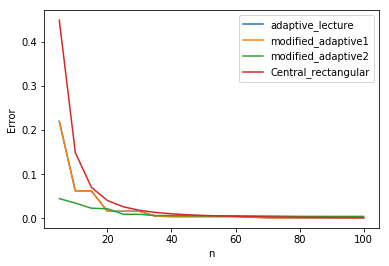

In [23]:
res= []
res1= []
res2=[]
res3=[]

npts=[5, 10, 15, 20, 25, 30, 35,40,45,50,55,60,70,80,90,100]

for n in npts:
    
    res.append(abs(adapt_rect_list(f, a, b, n)[0]- exact(a,b)))
    
    res1.append(abs(adapt_rect_list1(f, a, b, n)[0]- exact(a,b)))
    
    res2.append(abs(adapt_rect_list2(f, a, b, n)[0]- exact(a,b)))
    
    res3.append(abs(crect(f, a, b, n)- exact(a,b)))

plt.figure()
plt.plot(npts,res,label = 'adaptive_lecture')
plt.plot(npts,res1,label = 'modified_adaptive1')
plt.plot(npts,res2,label = 'modified_adaptive2')
plt.plot(npts,res3,label = 'Central_rectangular')
plt.ylabel('Error')
plt.xlabel('n')
plt.legend()
plt.plot()
plt.show()


